## Imports

In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

## Read data

In [54]:
df = pd.read_csv("car data.csv")
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


## Plot datas

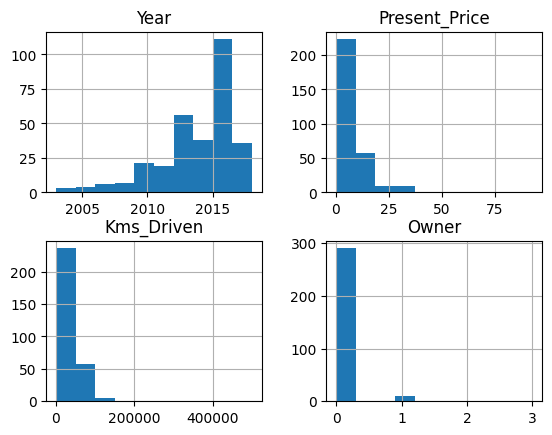

In [56]:
viz = df[["Year","Present_Price","Kms_Driven","Owner"]]
viz.hist()
plt.show()

Text(0, 0.5, 'Selling Price')

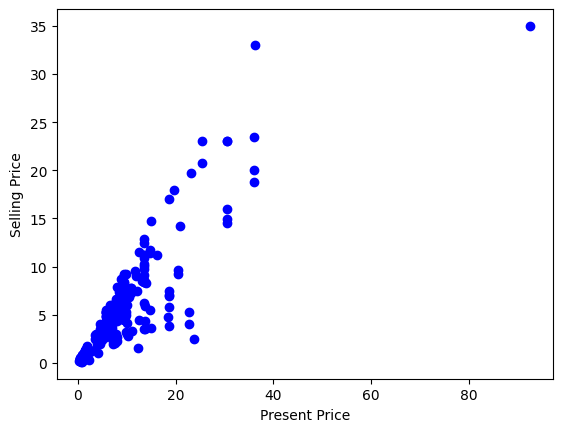

In [61]:
plt.scatter(df.Present_Price, df.Selling_Price, color="blue")
plt.xlabel("Present Price")
plt.ylabel("Selling Price")

Text(0, 0.5, 'Selling Price')

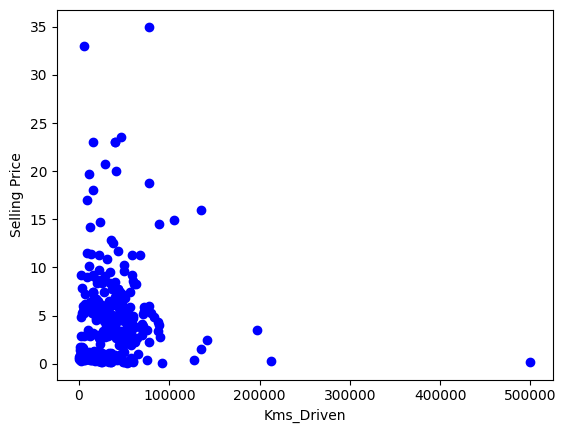

In [66]:
plt.scatter(df.Kms_Driven, df.Selling_Price, color="blue")
plt.xlabel("Kms_Driven")
plt.ylabel("Selling Price")

In [81]:
cdf = df[["Kms_Driven","Present_Price","Selling_Price"]]

## Separate

In [82]:
msk = np.random.rand(len(cdf)) < 0.8
train = cdf[msk]
test = cdf[~msk]

## Model

In [84]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
train_x = np.asanyarray(train[["Present_Price"]])
train_y = np.asanyarray(train[["Selling_Price"]])
reg.fit(train_x, train_y)

# results
print("Coefficients : %.2f" % reg.coef_)
print("Intercepts : %.2f" % reg.intercept_) 

Coefficients : 0.51
Intercepts : 0.74


/tmp/ipykernel_4602/2072597195.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Coefficients : %.2f" % reg.coef_)
/tmp/ipykernel_4602/2072597195.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Intercepts : %.2f" % reg.intercept_)


## Plot result

Text(0, 0.5, 'Selling Price')

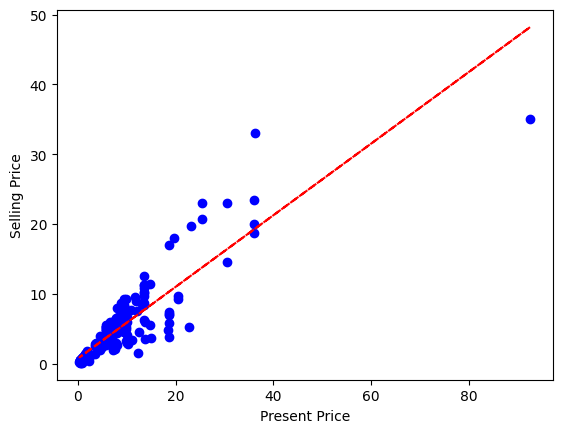

In [85]:
plt.scatter(train.Present_Price, train.Selling_Price, color="blue")
plt.plot(train_x, reg.coef_ * train_x + reg.intercept_, "--r")
plt.xlabel("Present Price")
plt.ylabel("Selling Price")

## Predict

In [86]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[["Present_Price"]])
test_y = np.asanyarray(test[["Selling_Price"]])
test_y_ = reg.predict(test_x)

# Errors
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_))

Mean absolute error: 1.60
Residual sum of squares (MSE): 6.39
R2-score: 0.72
